**SVM + CNN (EKSTRASIS FITUR)**

In [ ]:
# STEP 1: Install dan import libraries
!pip install gdown joblib --quiet

import gdown
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# STEP 2: Download ZIP dari Google Drive
file_id = "1ZySw90rLIPI7cniKqxmRUKAHWZLt_isb"
output = "skin_dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# STEP 3: Ekstrak ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(".")

# STEP 4: Path dataset
train_path = "skin-disease-dataset/train_set"
test_path = "skin-disease-dataset/test_set"

# STEP 5: Load model CNN (MobileNetV2)
model_cnn = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# STEP 6: Fungsi ekstrak fitur
def extract_features(folder):
    features = []
    labels = []
    for label in os.listdir(folder):
        class_path = os.path.join(folder, label)
        if not os.path.isdir(class_path): continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                image = load_img(img_path, target_size=(224, 224))
                image = img_to_array(image)
                image = preprocess_input(image)
                image = np.expand_dims(image, axis=0)

                feature = model_cnn.predict(image, verbose=0)
                features.append(feature.flatten())
                labels.append(label)
            except:
                print(f"Skipped {img_path}")
    return np.array(features), np.array(labels)

# STEP 7: Ekstrak fitur dari train dan test
X_train, y_train = extract_features(train_path)
X_test, y_test = extract_features(test_path)

# STEP 8: Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# STEP 9: Train SVM dan evaluasi
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)

# STEP 10: Evaluasi model
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM MURNI

Downloading...
From: https://drive.google.com/uc?id=1ZySw90rLIPI7cniKqxmRUKAHWZLt_isb
To: /content/skin_dataset.zip
100%|██████████| 18.1M/18.1M [00:00<00:00, 47.2MB/s]



Classification Report:

                            precision    recall  f1-score   support

            BA- cellulitis       0.79      0.79      0.79        34
               BA-impetigo       0.64      0.90      0.75        20
           FU-athlete-foot       0.87      0.81      0.84        32
            FU-nail-fungus       0.71      0.52      0.60        33
               FU-ringworm       0.77      0.74      0.76        23
PA-cutaneous-larva-migrans       0.67      0.72      0.69        25
             VI-chickenpox       0.94      0.94      0.94        34
               VI-shingles       0.83      0.88      0.85        33

                  accuracy                           0.79       234
                 macro avg       0.78      0.79      0.78       234
              weighted avg       0.79      0.79      0.78       234



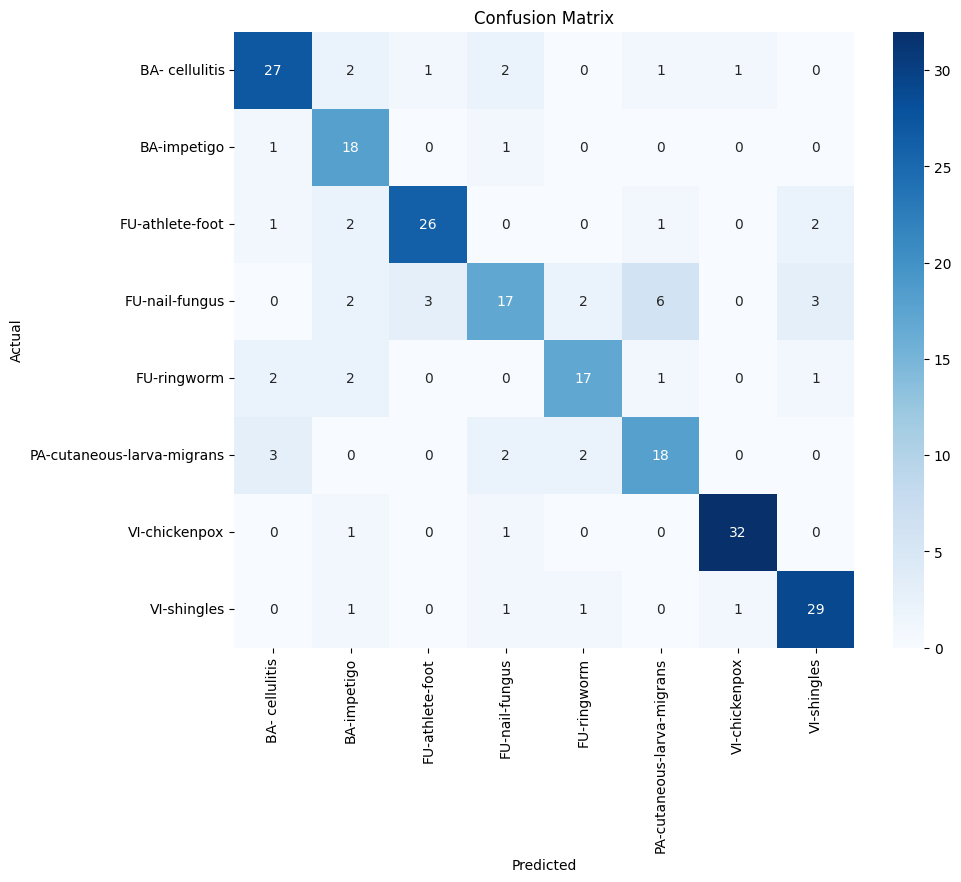

In [1]:
# STEP 1: Install dan import libraries
!pip install gdown --quiet

import gdown
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# STEP 2: Download ZIP dari Google Drive
file_id = "1ZySw90rLIPI7cniKqxmRUKAHWZLt_isb"
output = "skin_dataset.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# STEP 3: Ekstrak ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(".")

# STEP 4: Path dataset
train_path = "skin-disease-dataset/train_set"
test_path = "skin-disease-dataset/test_set"

# STEP 5: Fungsi ekstrak fitur tanpa CNN (gambar di-resize lalu diflatten)
def extract_features_flat(folder, target_size=(64, 64)):
    features = []
    labels = []
    for label in os.listdir(folder):
        class_path = os.path.join(folder, label)
        if not os.path.isdir(class_path): continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                image = load_img(img_path, target_size=target_size)
                image = img_to_array(image)
                image = image / 255.0  # Normalisasi
                features.append(image.flatten())  # Flatten
                labels.append(label)
            except:
                print(f"Skipped {img_path}")
    return np.array(features), np.array(labels)

# STEP 6: Ekstrak fitur dari train dan test
X_train, y_train = extract_features_flat(train_path)
X_test, y_test = extract_features_flat(test_path)

# STEP 7: Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# STEP 8: Train SVM dan evaluasi
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)

# STEP 9: Evaluasi model
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RANDOM FOREST MURNI


Classification Report:

                            precision    recall  f1-score   support

            BA- cellulitis       0.58      0.74      0.65        34
               BA-impetigo       0.65      0.65      0.65        20
           FU-athlete-foot       0.95      0.66      0.78        32
            FU-nail-fungus       0.72      0.55      0.62        33
               FU-ringworm       0.73      0.48      0.58        23
PA-cutaneous-larva-migrans       0.63      0.68      0.65        25
             VI-chickenpox       0.71      0.94      0.81        34
               VI-shingles       0.70      0.79      0.74        33

                  accuracy                           0.70       234
                 macro avg       0.71      0.68      0.69       234
              weighted avg       0.71      0.70      0.69       234



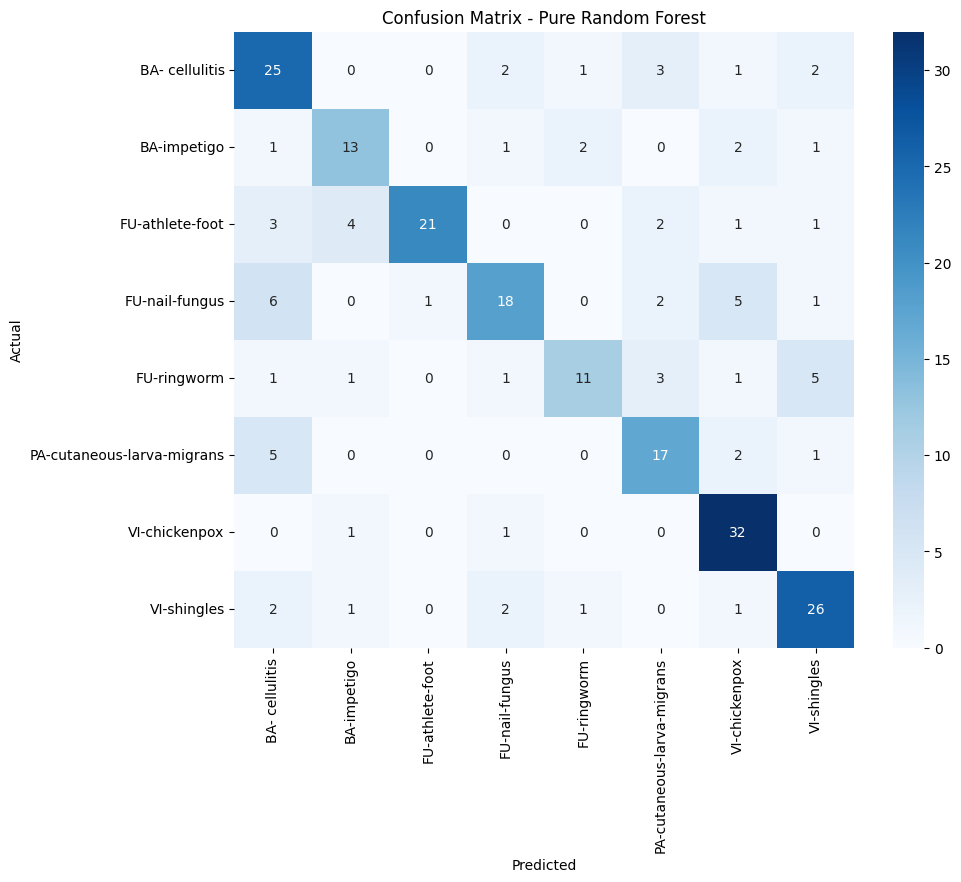

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# STEP 1: Path dataset
train_path = "skin-disease-dataset/train_set"
test_path = "skin-disease-dataset/test_set"

# STEP 2: Fungsi ekstraksi fitur mentah
def extract_raw_pixels(folder, img_size=(64, 64)):
    features = []
    labels = []
    for label in os.listdir(folder):
        class_path = os.path.join(folder, label)
        if not os.path.isdir(class_path): continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                img_flat = img_array.flatten() / 255.0  # Normalisasi
                features.append(img_flat)
                labels.append(label)
            except:
                print(f"Skipped: {img_path}")
    return np.array(features), np.array(labels)

# STEP 3: Load data
X_train, y_train = extract_raw_pixels(train_path)
X_test, y_test = extract_raw_pixels(test_path)

# STEP 4: Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# STEP 5: Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_enc)

# STEP 6: Evaluasi
y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Pure Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


decistion tree

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path dataset
train_path = "skin-disease-dataset/train_set"
test_path = "skin-disease-dataset/test_set"

# Fungsi ekstraksi fitur gambar (pixel flatten)
def extract_raw_pixels(folder, img_size=(64, 64)):
    features = []
    labels = []
    for label in os.listdir(folder):
        class_path = os.path.join(folder, label)
        if not os.path.isdir(class_path): continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                img_flat = img_array.flatten() / 255.0
                features.append(img_flat)
                labels.append(label)
            except:
                print(f"Skipped: {img_path}")
    return np.array(features), np.array(labels)

# Load data
X_train, y_train = extract_raw_pixels(train_path)
X_test, y_test = extract_raw_pixels(test_path)

# Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Latih Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_enc)

# Evaluasi
y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Pure Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN:


Classification Report:

                            precision    recall  f1-score   support

            BA- cellulitis       0.58      0.44      0.50        34
               BA-impetigo       0.40      0.30      0.34        20
           FU-athlete-foot       0.71      0.47      0.57        32
            FU-nail-fungus       0.50      0.24      0.33        33
               FU-ringworm       0.25      0.57      0.35        23
PA-cutaneous-larva-migrans       0.69      0.36      0.47        25
             VI-chickenpox       0.71      0.85      0.77        34
               VI-shingles       0.39      0.61      0.48        33

                  accuracy                           0.49       234
                 macro avg       0.53      0.48      0.48       234
              weighted avg       0.54      0.49      0.49       234



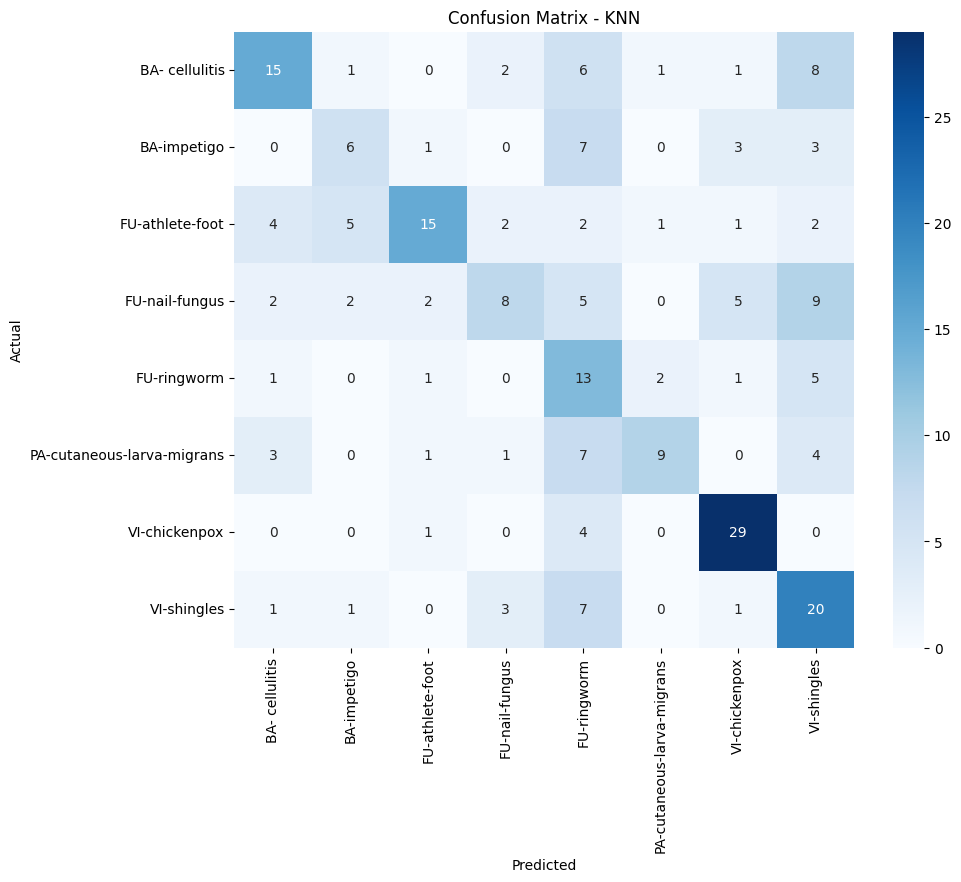

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path dataset
train_path = "skin-disease-dataset/train_set"
test_path = "skin-disease-dataset/test_set"

# Fungsi ekstraksi fitur gambar (flatten pixel)
def extract_raw_pixels(folder, img_size=(64, 64)):
    features = []
    labels = []
    for label in os.listdir(folder):
        class_path = os.path.join(folder, label)
        if not os.path.isdir(class_path): continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                img_flat = img_array.flatten() / 255.0
                features.append(img_flat)
                labels.append(label)
            except:
                print(f"Skipped: {img_path}")
    return np.array(features), np.array(labels)

# Load dan ekstrak fitur
X_train, y_train = extract_raw_pixels(train_path)
X_test, y_test = extract_raw_pixels(test_path)

# Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=3)  # kamu bisa ubah ke 5 atau 7 juga
knn.fit(X_train, y_train_enc)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test)

# Laporan klasifikasi
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
